# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [26]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14


#Read data & drop unnecessary columns
X = pd.read_csv('C:\\Users\\Michael\\Desktop\\MLData\\3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)

#Create a new df by copying the original & standardizing the values for alt, lat, and lon
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()


In [27]:
X.head()


,lat,lon,alt
101023,9.560884,56.961862,19.549073
216526,9.954601,57.015242,36.403037
335283,9.989288,56.651805,43.666706
87126,10.288311,57.619686,8.493925
414911,10.512950,57.714365,6.066571


In [28]:
XX.head()


,lat,lon,alt
101023,-0.279815,-0.421991,-0.145276
216526,0.348929,-0.238434,0.756316
335283,0.404322,-1.488186,1.144882
87126,0.881844,1.840068,-0.736665
414911,1.240579,2.165640,-0.866514


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#Define both min samples and epsilon range for the iterative loop (apply DBscan for the selected columns + calculate silohouette score)
min_samples_range = range(1, 11)
epsilon_range = np.arange(0.05, 0.51, 0.05)

all_scores = []

for min_sample in min_samples_range:
    scores = []
    for epsilon in epsilon_range:
        db = DBSCAN(eps=epsilon, min_samples=min_sample).fit(XX[['lon', 'lat', 'alt']])
        score = silhouette_score(XX[['lon', 'lat', 'alt']], db.labels_)
        scores.append(score)
    all_scores.append(scores)
    


<IPython.core.display.Javascript object>


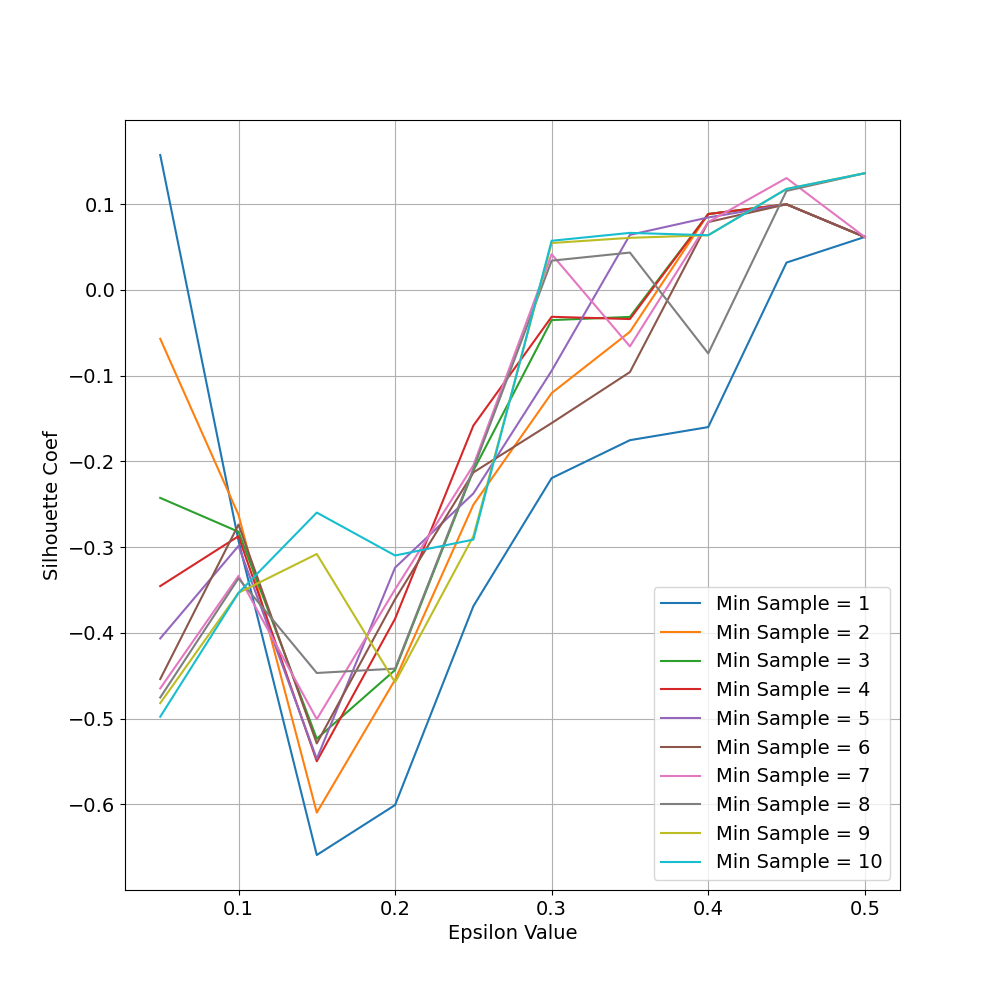

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

#Plot min samples for epsilon vs silhouette coefficient
plt.plot(epsilon_range, all_scores[0], label='Min Sample = 1')
plt.plot(epsilon_range, all_scores[1], label='Min Sample = 2')
plt.plot(epsilon_range, all_scores[2], label='Min Sample = 3')
plt.plot(epsilon_range, all_scores[3], label='Min Sample = 4')
plt.plot(epsilon_range, all_scores[4], label='Min Sample = 5')
plt.plot(epsilon_range, all_scores[5], label='Min Sample = 6')
plt.plot(epsilon_range, all_scores[6], label='Min Sample = 7')
plt.plot(epsilon_range, all_scores[7], label='Min Sample = 8')
plt.plot(epsilon_range, all_scores[8], label='Min Sample = 9')
plt.plot(epsilon_range, all_scores[9], label='Min Sample = 10')

#label axis + legend/grid
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Coef')
plt.legend()
plt.grid(True)
plt.show()


## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [87]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14

#Read data & drop unnecessary columns
X1 = pd.read_csv('C:\\Users\\Michael\\Desktop\\MLData\\Stars.csv',index_col=False)
X1 = X1.drop(['A_M','Color', 'Spectral_Class','Type'], axis=1).sample(240)


In [88]:
X1.head()


,Temperature,L,R
78,2621,0.00060,0.09800
178,12100,120000.00000,708.90000
172,4287,630000.00000,1315.00000
209,19360,0.00125,0.00998
115,3553,145000.00000,1324.00000


In [89]:
#Create a new df by copying the original & standardizing the values for Temperature, L, and R
XX1 = X1.copy()
XX1['Temperature'] = (X1['Temperature'] - X1['Temperature'].mean()) / X1['Temperature'].std()
XX1['L'] = (X1['L'] - X1['L'].mean()) / X1['L'].std()
XX1['R'] = (X1['R'] - X1['R'].mean()) / X1['R'].std()

XX1.head()


,Temperature,L,R
78,-0.824551,-0.597375,-0.458391
178,0.167762,0.071401,0.912186
172,-0.650145,2.913699,2.084173
209,0.927779,-0.597375,-0.458562
115,-0.726984,0.210729,2.101576


<IPython.core.display.Javascript object>


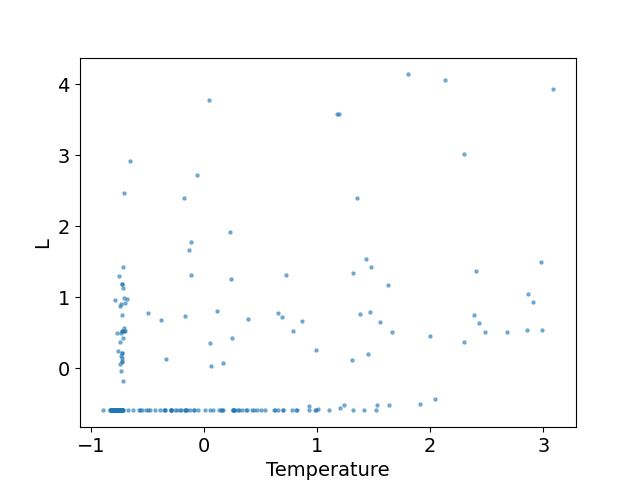

In [90]:
fig = plt.figure()
plt.scatter(XX1['Temperature'], XX1['L'], alpha=0.5, s=5)
plt.xlabel('Temperature')
plt.ylabel('L')
plt.show()


In [91]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#Define both min samples and epsilon range for the iterative loop (apply DBscan for the selected columns + calculate silohouette score)
min_samples_range = range(1, 11)
epsilon_range = np.arange(0.05, 0.51, 0.01)

all_scores = []

for min_sample in min_samples_range:
    scores = []
    for epsilon in epsilon_range:
        db = DBSCAN(eps=epsilon, min_samples=min_sample).fit(XX1[['Temperature', 'L', 'R']])
        score = silhouette_score(XX1[['Temperature', 'L', 'R']], db.labels_)
        scores.append(score)
    all_scores.append(scores)


<IPython.core.display.Javascript object>


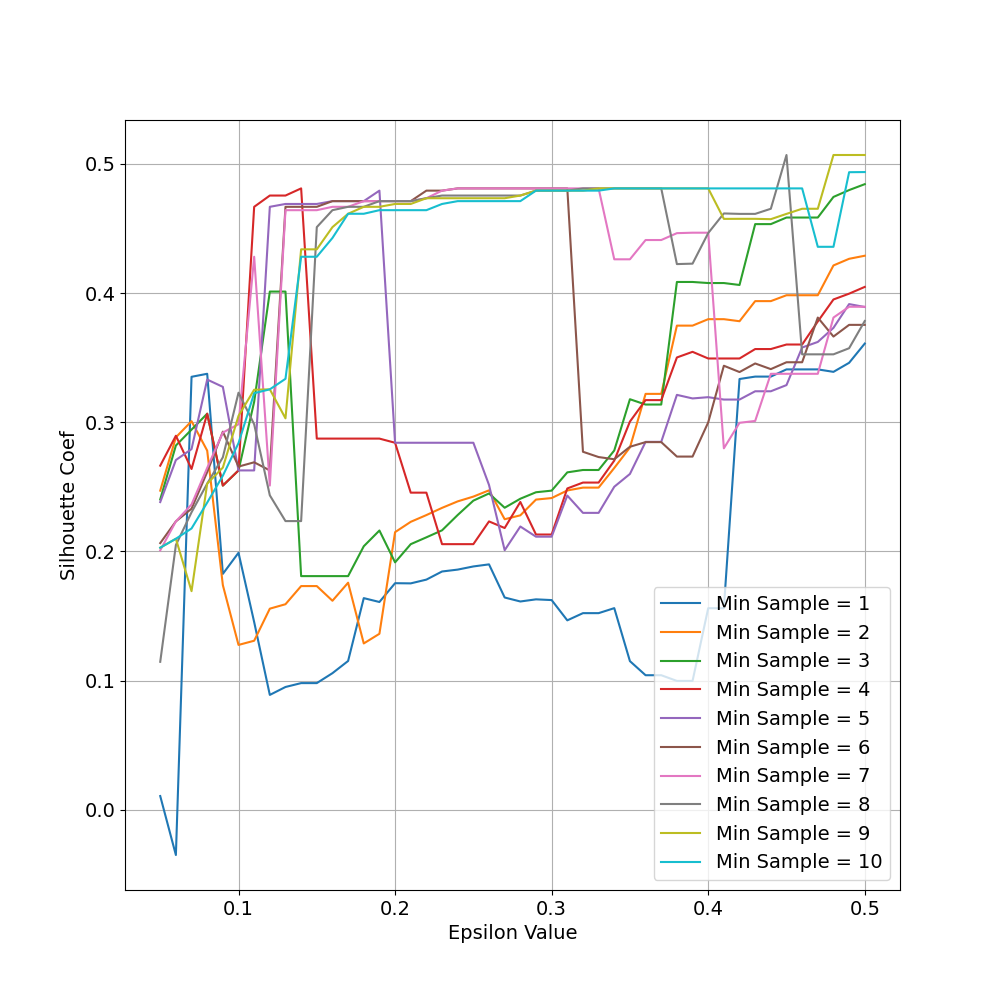

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#Plot min samples for epsilon vs silhouette coefficient 
plt.plot(epsilon_range, all_scores[0], label='Min Sample = 1')
plt.plot(epsilon_range, all_scores[1], label='Min Sample = 2')
plt.plot(epsilon_range, all_scores[2], label='Min Sample = 3')
plt.plot(epsilon_range, all_scores[3], label='Min Sample = 4')
plt.plot(epsilon_range, all_scores[4], label='Min Sample = 5')
plt.plot(epsilon_range, all_scores[5], label='Min Sample = 6')
plt.plot(epsilon_range, all_scores[6], label='Min Sample = 7')
plt.plot(epsilon_range, all_scores[7], label='Min Sample = 8')
plt.plot(epsilon_range, all_scores[8], label='Min Sample = 9')
plt.plot(epsilon_range, all_scores[9], label='Min Sample = 10')

#label axis + legend/grid
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Coef')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
dbscan = DBSCAN(eps=0.5, min_samples =9)
XX1.cluster = dbscan.fit_predict(XX1[['Temperature','L', 'R']])
metrics.silhouette_score(XX1[['Temperature','L', 'R']], XX1.cluster)


0.5068626696002554

<IPython.core.display.Javascript object>


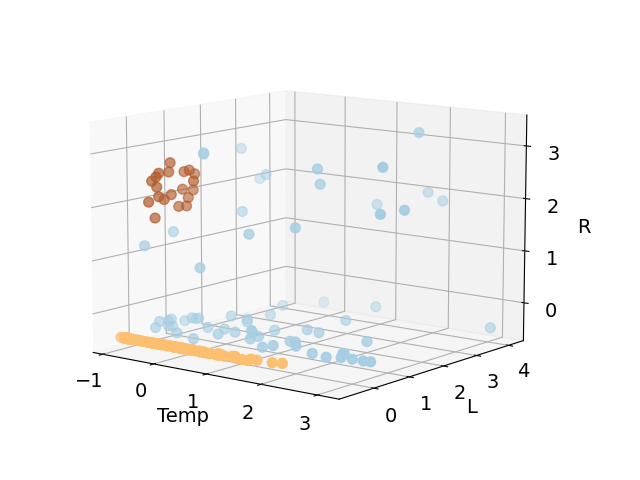

C:\Users\Michael\AppData\Local\Temp\ipykernel_19052\1321715560.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [95]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()
ax.scatter(XX1['Temperature'], XX1['L'], XX1['R'], c=XX1.cluster, s=50, cmap='Paired')
ax.set_xlabel('Temp')
ax.set_ylabel('L')
ax.set_zlabel('R')
plt.show()


<IPython.core.display.Javascript object>


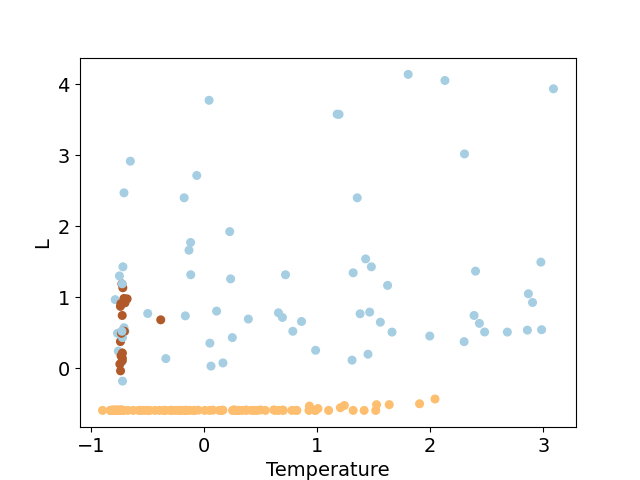

In [96]:
fig = plt.figure()
plt.scatter(XX1['Temperature'], XX1['L'], c=XX1.cluster, s=30, cmap='Paired')
plt.xlabel('Temperature')
plt.ylabel('L')
plt.show()


In [84]:
from sklearn.decomposition import PCA

#Copy X1 dataframe and name it starsPCA
starsPCA = X1.copy()

#Create a new df by copying the original & standardizing the values for Temperature, L, and R
starsPCA['Temperature'] = (X1['Temperature'] - X1['Temperature'].mean()) / X1['Temperature'].std()
starsPCA['L'] = (X1['L'] - X1['L'].mean()) / X1['L'].std()
starsPCA['R'] = (X1['R'] - X1['R'].mean()) / X1['R'].std()

#Apply Principal Component Analysis to reduce dimensions to n = 1
pca = PCA(n_components=1)
starsPCAFit = pca.fit_transform(starsPCA[['Temperature', 'L', 'R']])

#Print the explained variance ratio for the first component
print(pca.explained_variance_ratio_[0])


0.5629996844172487
